In [84]:
%load_ext autoreload
%autoreload 2
from orphics import maps,cosmology,io,stats
from enlib import enmap
import numpy as np



In [98]:
lc = cosmology.LimberCosmology(lmax=2000,pickling=True)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_2000_20171130.pkl
Loaded cached Cls from  output/clphi_2000_20171130.txt
Initializing CMB window..
initializing power...


In [99]:
lc.addStepNz("g1",0.1,0.3,bias=2)
lc.addStepNz("g2",0.3,0.4,bias=2)
lc.addStepNz("g3",0.4,0.5,bias=2)

('Initializing galaxy window for ', 'g1', ' ...')
('Initializing galaxy window for ', 'g2', ' ...')
('Initializing galaxy window for ', 'g3', ' ...')


In [100]:
ellrange = np.arange(0,2000,1)
lc.generateCls(ellrange)
clkk = lc.getCl("cmb","cmb")
clk1 = lc.getCl("cmb","g1")
cl11 = lc.getCl("g1","g1")
cl12 = lc.getCl("g1","g2")
cl22 = lc.getCl("g2","g2")
cl33 = lc.getCl("g3","g3")


In [112]:
ps = np.zeros((4,4,ellrange.size))
ps[0,0] = clkk
ps[1,1] = cl11
ps[2,2] = cl22
ps[3,3] = cl33
ps[0,1] = clk1
ps[1,0] = clk1
ps[1,2] = cl12


In [113]:
shape, wcs = maps.rect_geometry(width_deg=25.,px_res_arcmin=2.0)
shape = (4,)+shape
mg = maps.MapGen(shape,wcs,ps)

In [114]:
imaps = mg.get_map(scalar=True)

In [115]:
print(imaps.shape)

(4, 750, 750)


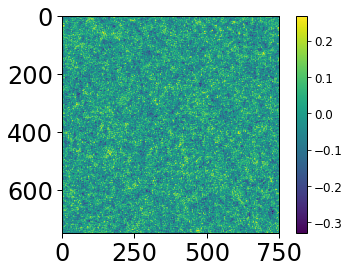

In [116]:
io.plot_img(imaps[0])

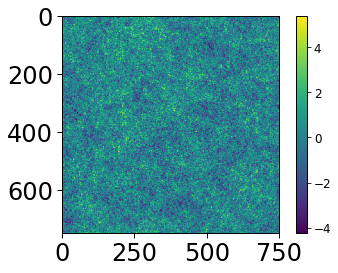

In [107]:
io.plot_img(imaps[1])

In [117]:
# power spectra

fc = maps.FourierCalc(shape,wcs)

p2dkk, kkappa, _ = fc.power2d(imaps[0])
p2dk1, kg1 = fc.f1power(imaps[1],kkappa)


In [121]:
modlmap = enmap.modlmap(shape,wcs)
bin_edges = np.arange(100,2000,80)
binner = stats.bin2D(modlmap,bin_edges)

In [122]:
cents, eclkk = binner.bin(p2dkk)
cents, eclk1 = binner.bin(p2dk1)

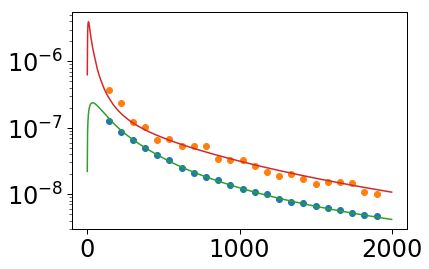

In [123]:
pl = io.Plotter(yscale='log')
pl.add(cents,eclkk,marker="o",ls="none")
pl.add(cents,eclk1,marker="o",ls="none")
pl.add(ellrange,clkk)
pl.add(ellrange,clk1)
pl.done()